Milestone 1: Dataset Collection & Preprocessing

Week 1

In [ ]:
# Week 1
import os                  # For handling file paths and directories
import cv2                 # OpenCV library for image processing
import pandas as pd        # For handling tabular data (CSV, DataFrames)
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
from tqdm import tqdm      # For showing progress bars during iterations


In [ ]:
# Define base paths for raw and processed data
raw_base = r"C:\\msys64\\home\\Raghav Thaman\\internship\\data\\SUPATLANTIQUE_RAW"
proc_base = r"C:\\msys64\\home\\Raghav Thaman\\internship\\data\\SUPATLANTIQUE_PROC"

# Path to the labels CSV file
labels_path = os.path.join(raw_base, "labels.csv")

# Load labels into a Pandas DataFrame
df = pd.read_csv(labels_path)

# Display the first 5 rows to inspect data
df.head()

,file_path,scanner_model,dpi,doc_type
0,C:\msys64\home\Raghav Thaman\internship\data\S...,Canon120-1,150,Officials
1,C:\msys64\home\Raghav Thaman\internship\data\S...,Canon120-1,150,Officials
2,C:\msys64\home\Raghav Thaman\internship\data\S...,Canon120-1,150,Officials
3,C:\msys64\home\Raghav Thaman\internship\data\S...,Canon120-1,150,Officials
4,C:\msys64\home\Raghav Thaman\internship\data\S...,Canon120-1,150,Officials


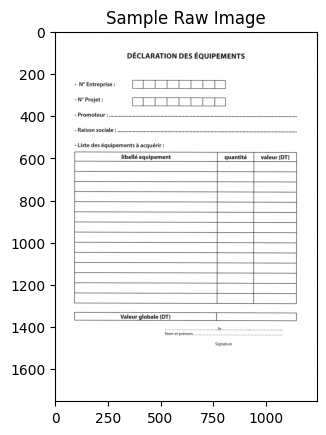

In [ ]:
# This block: 
# Picks one image from your dataset

# Reads it in grayscale

# Displays it in the notebook
sample_path = df["file_path"].iloc[0]
img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.title("Sample Raw Image")
plt.show()


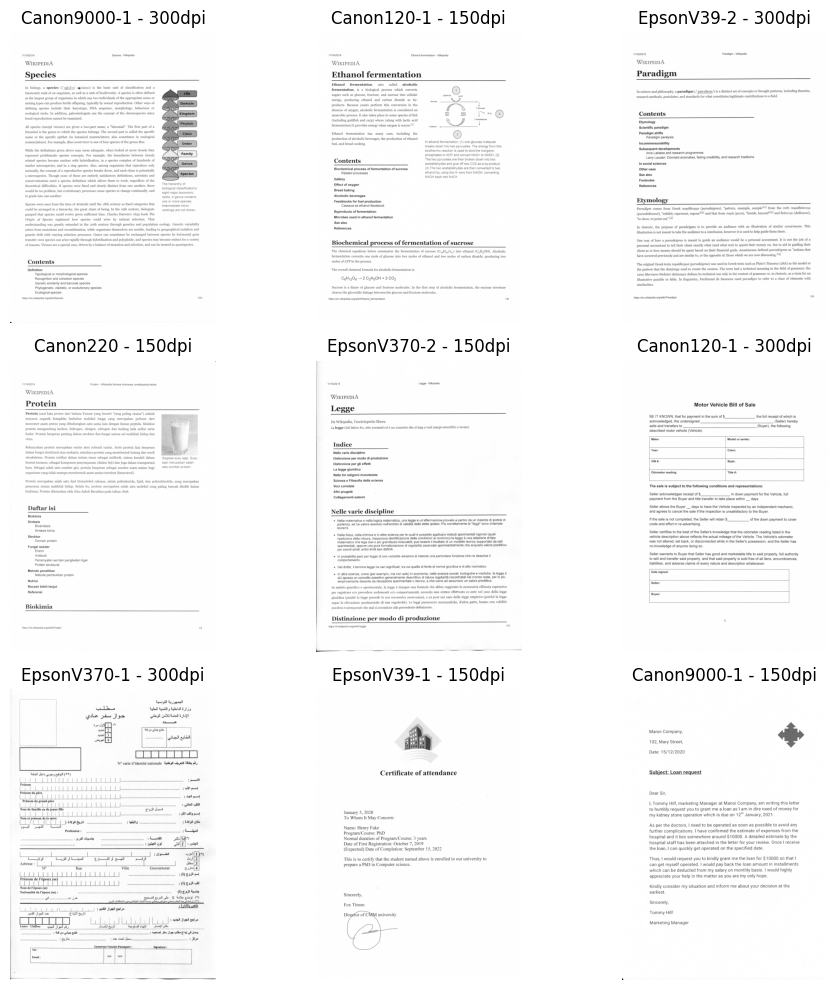

In [ ]:
import random

# Randomly pick 9 samples from the dataset
samples = df.sample(9)

# Create a figure with 3x3 subplots (grid of 9 images)
plt.figure(figsize=(10, 10))

# Loop over the selected samples and plot them
for i, (_, row) in enumerate(samples.iterrows()):
    # Read each image in grayscale mode
    img = cv2.imread(row["file_path"], cv2.IMREAD_GRAYSCALE)

    # Place the image in the corresponding subplot
    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap="gray")

    # Add title with scanner model and dpi for context
    plt.title(f"{row['scanner_model']} - {row['dpi']}dpi")

    # Hide axes for a cleaner look
    plt.axis("off")

# Adjust spacing between subplots for readability
plt.tight_layout()

# Display all images
plt.show()

Week 2

In [ ]:
# Week 2
import os
import cv2
from tqdm import tqdm

# Paths
raw_base = r"C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_RAW"
proc_base = r"C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC"

# Resize size
IMG_SIZE = (256, 256)

# Create output base folder
os.makedirs(proc_base, exist_ok=True)

print("🚀 Starting preprocessing...")

for i, row in tqdm(df.iterrows(), total=len(df)):
    src_path = row["file_path"]
    doc_type = row["doc_type"]
    scanner = row["scanner_model"]
    dpi = str(row["dpi"])

    # Destination folder
    dest_folder = os.path.join(proc_base, doc_type, scanner, dpi)
    os.makedirs(dest_folder, exist_ok=True)

    # Destination file path
    file_name = os.path.basename(src_path)
    dest_path = os.path.join(dest_folder, file_name)

    # Read image in grayscale
    img = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    # Resize to fixed size
    img_resized = cv2.resize(img, IMG_SIZE)

    # Normalize (0–1 range) and back to 0–255 uint8 for saving
    img_norm = (img_resized / 255.0) * 255
    img_norm = img_norm.astype("uint8")

    # Save
    cv2.imwrite(dest_path, img_norm)

print("✅ Preprocessing complete!")
print(f"Processed dataset saved in: {proc_base}")


🚀 Starting preprocessing...


100%|██████████| 4568/4568 [15:23<00:00,  4.95it/s]  

✅ Preprocessing complete!
Processed dataset saved in: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC



Image: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Officials\EpsonV370-2\300\s7_33.tif
 - Shape: (256, 256)
 - Data type: uint8
 - Min pixel value: 50
 - Max pixel value: 255
 - Mean intensity: 242.28


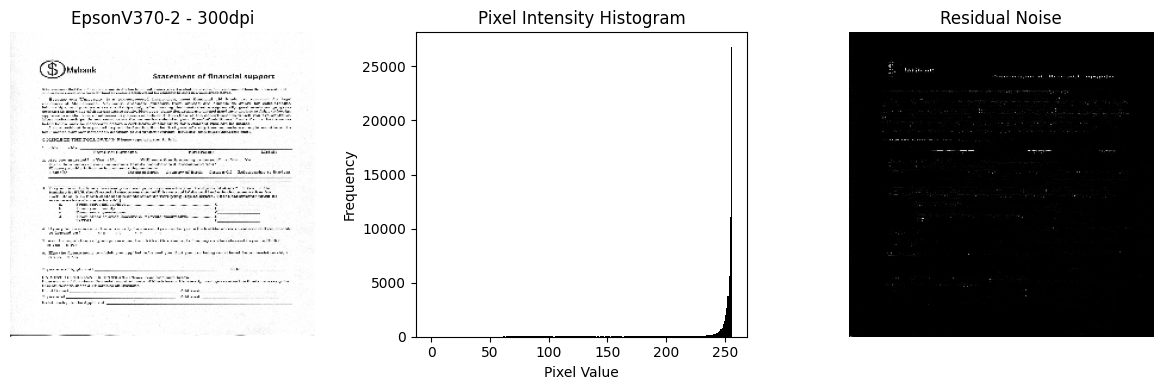

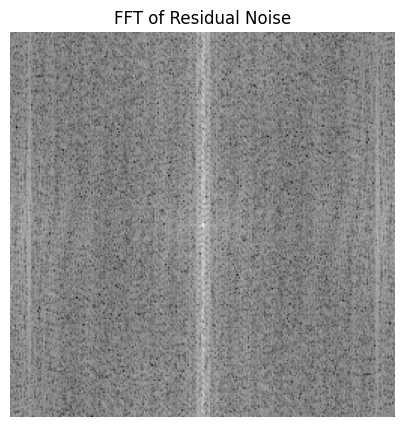


Image: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Officials\EpsonV370-2\300\s7_86.tif
 - Shape: (256, 256)
 - Data type: uint8
 - Min pixel value: 46
 - Max pixel value: 255
 - Mean intensity: 247.91


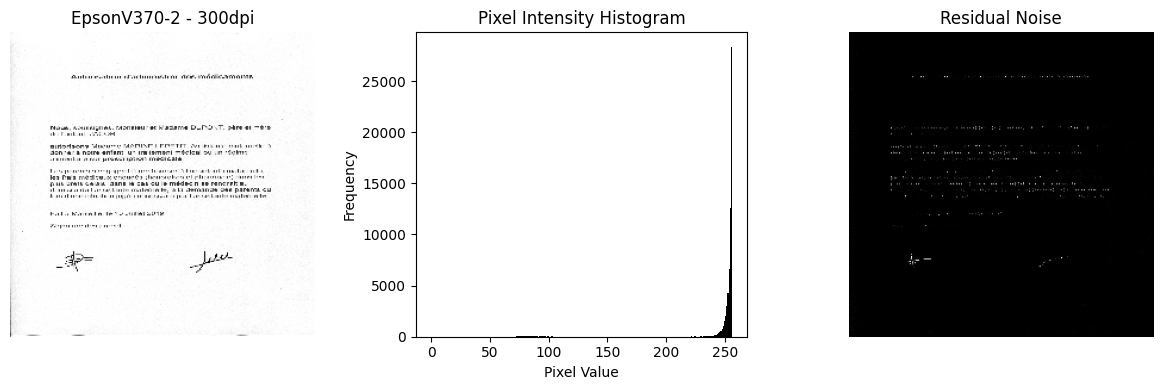

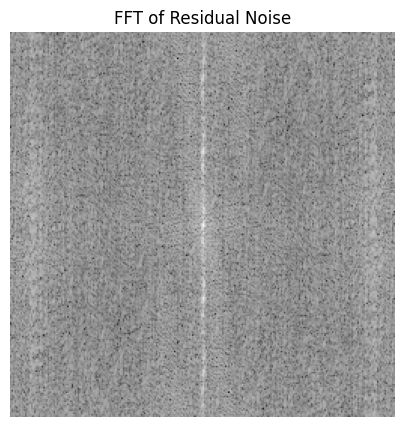


Image: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Wikipedia\HP\150\s11_94.tif
 - Shape: (256, 256)
 - Data type: uint8
 - Min pixel value: 64
 - Max pixel value: 255
 - Mean intensity: 238.51


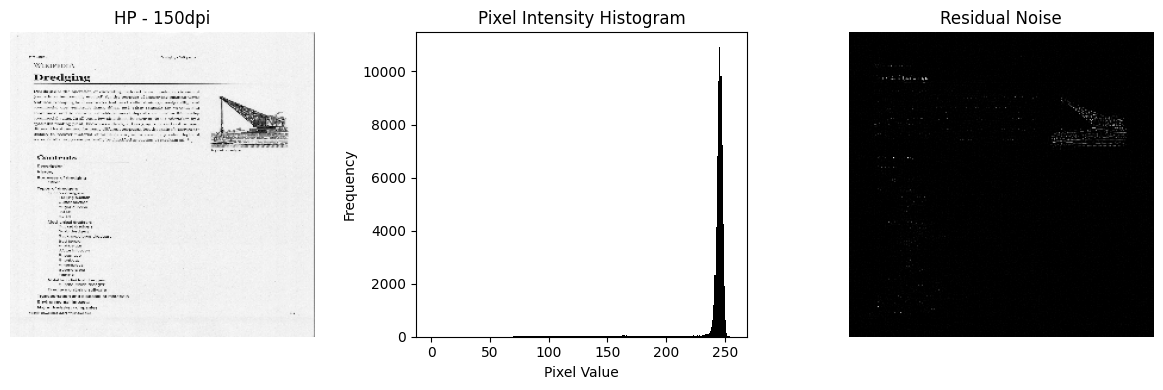

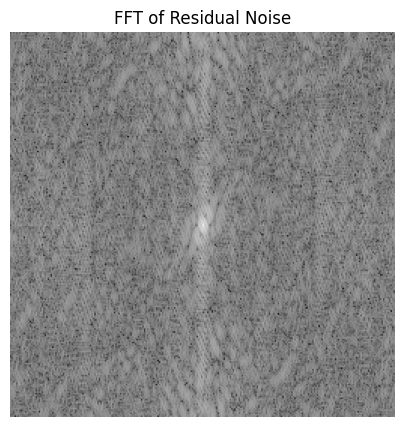

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Pick 3 random images from the processed dataset
sample_rows = df.sample(3)

for idx, row in sample_rows.iterrows():
    # Build processed path
    img_path = os.path.join(proc_base, row["doc_type"], row["scanner_model"], str(row["dpi"]), os.path.basename(row["file_path"]))
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    print(f"\nImage: {img_path}")
    print(f" - Shape: {img.shape}")
    print(f" - Data type: {img.dtype}")
    print(f" - Min pixel value: {img.min()}")
    print(f" - Max pixel value: {img.max()}")
    print(f" - Mean intensity: {img.mean():.2f}")

    # --- Histogram ---
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.imshow(img, cmap="gray")
    plt.title(f"{row['scanner_model']} - {row['dpi']}dpi")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.hist(img.ravel(), bins=256, range=(0,256), color="black")
    plt.title("Pixel Intensity Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

    # --- Residual Noise ---
    denoised = cv2.medianBlur(img, 3)
    residual = cv2.subtract(img, denoised)

    plt.subplot(1,3,3)
    plt.imshow(residual, cmap="gray")
    plt.title("Residual Noise")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # --- FFT Analysis ---
    f = np.fft.fft2(residual)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift)+1)

    plt.figure(figsize=(5,5))
    plt.imshow(magnitude_spectrum, cmap="gray")
    plt.title("FFT of Residual Noise")
    plt.axis("off")
    plt.show()



Image: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Wikipedia\Canon120-2\150\s2_11.tif
 - Shape: (256, 256)
 - Data type: uint8
 - Min pixel value: 42
 - Max pixel value: 255
 - Mean intensity: 236.49


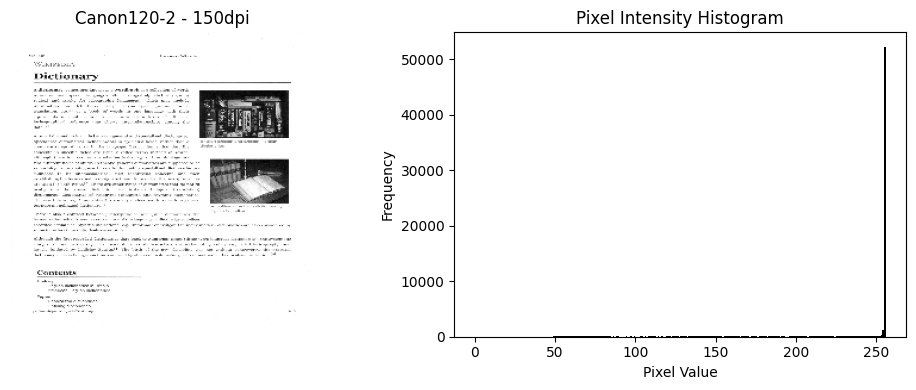


Image: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Officials\EpsonV550\300\s10_97.tif
 - Shape: (256, 256)
 - Data type: uint8
 - Min pixel value: 50
 - Max pixel value: 255
 - Mean intensity: 249.23


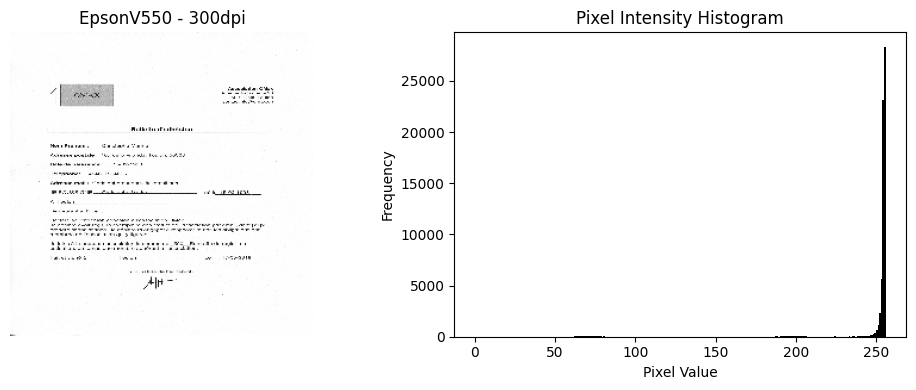


Image: C:\msys64\home\Raghav Thaman\internship\data\SUPATLANTIQUE_PROC\Wikipedia\Canon220\300\s3_37.tif
 - Shape: (256, 256)
 - Data type: uint8
 - Min pixel value: 32
 - Max pixel value: 255
 - Mean intensity: 242.31


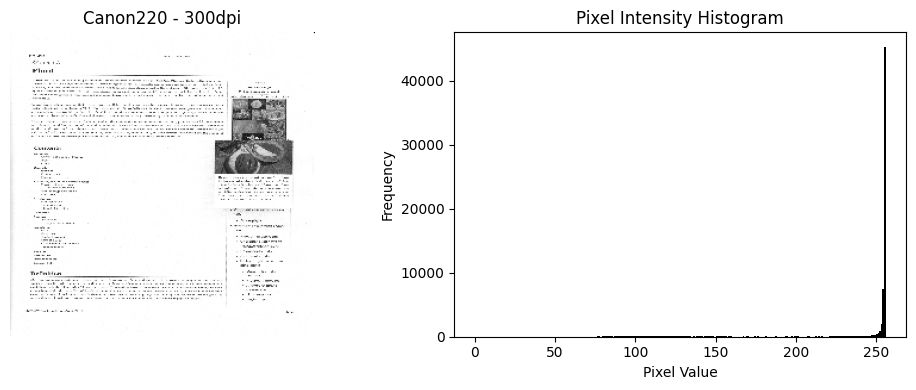

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ✅ Step 1: Randomly pick 3 processed images for verification
sample_rows = df.sample(3)

for idx, row in sample_rows.iterrows():
    # Construct the full path for the processed image
    img_path = os.path.join(
        proc_base, 
        row["doc_type"],          # Subfolder by document type
        row["scanner_model"],     # Subfolder by scanner model
        str(row["dpi"]),          # Subfolder by DPI
        os.path.basename(row["file_path"])  # Original filename
    )

    # Read image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Skip if image not found
    if img is None:
        continue

    # Print basic image metadata
    print(f"\nImage: {img_path}")
    print(f" - Shape: {img.shape}")                # Image dimensions (height, width)
    print(f" - Data type: {img.dtype}")            # Pixel data type (e.g., uint8)
    print(f" - Min pixel value: {img.min()}")      # Darkest pixel
    print(f" - Max pixel value: {img.max()}")      # Brightest pixel
    print(f" - Mean intensity: {img.mean():.2f}")  # Average brightness

    # ✅ Step 2: Display image and its histogram
    plt.figure(figsize=(10, 4))

    # Left subplot → processed image
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"{row['scanner_model']} - {row['dpi']}dpi")
    plt.axis("off")

    # Right subplot → pixel intensity histogram
    plt.subplot(1, 2, 2)
    plt.hist(img.ravel(), bins=256, range=(0, 256), color="black")
    plt.title("Pixel Intensity Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()